# HDA - Project 3

In [2]:
import utils
import deeplearning
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from keras import regularizers
from keras.activations import relu
from keras.layers import Conv2D, BatchNormalization, Dropout, LeakyReLU, Flatten, Activation, Dense, MaxPooling2D, LSTM, Reshape
from keras.models import Model, Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


The following cell contains the hyper-parameters that can be tuned for code execution:
- subject: select the subject on which to test the model, between [1,4];
- folder: directory name where '.mat' files are stored;
- label_col: column of features to be selected to perform activity detection, between [0,6]:

|  Label |  Feature |
|:-:     |:-:|
|  0     | Locomotion (TASK A)  |
|  1     | High Level Activity |
|  2     | Low Level Left Arm  |
|  3     | Low Level Left Arm Object  |
|  4     | Low Level Right Arm  |
|  5     | Low Level Right Arm Object  |
|  6     | Medium Level Both Arms (TASK B2) |

- window_size: parameter that sets the length of temporal windows on which to perform the convolution;
- stride: step length to chose the next window.

The size of the temporal window seems to be fundamental in order to get a more specific and powerful model; of course the choice of the step lenght between consequent windows has to be consistent and to make sense. Thinking about a real-time situation, as long as we collect data we can use a sliding window of real-time samples; in this way, it is reasonable to use also a small value for the stride. Another important reason behind the choice of the value of the 

In [3]:
subject = 1
folder = "./data/full/"
label = 0     # default for task A
window_size = 64
stride = 3
null_class = True

In [4]:
[x_train, y_train, x_test, y_test, n_classes] = utils.preprocessing(subject,
                                                         folder,
                                                         label,
                                                         window_size,
                                                         stride,
                                                         null_class)


Session shapes:
ADL1:   (45810, 110)
ADL2:   (28996, 110)
ADL3:   (30167, 110)
ADL4:   (30228, 110)
ADL5:   (27308, 110)
Drill:  (52152, 110)
Training samples:  157125 
Test samples:       57536 
Features:             110
TRAINING SET:
Features have shape:  (52354, 64, 110) 
Labels have shape:    (52354, 5) 
Fraction of labels:   [0.10988654 0.41987241 0.27476411 0.17119991 0.02427704]
TEST SET:
Features have shape:  (19157, 64, 110) 
Labels have shape:    (19157, 5) 
Fraction of labels:   [0.17742862 0.34337318 0.20290233 0.23771989 0.03857598]


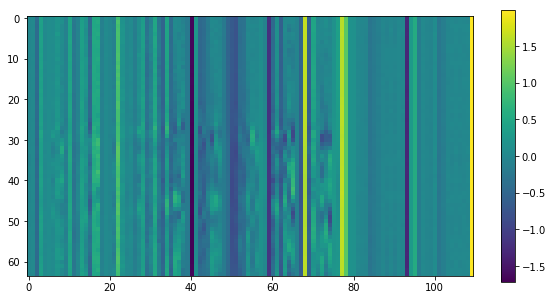

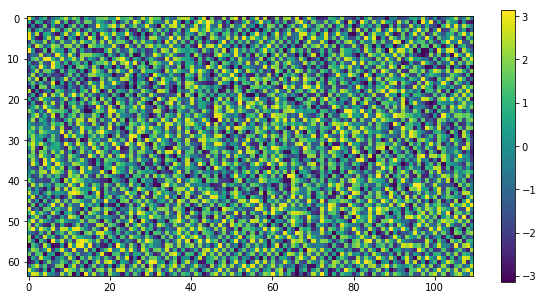

In [20]:
plt.imshow(x_train[0])
plt.colorbar()
fig_size = (10,5)
plt.rcParams["figure.figsize"] = fig_size
plt.show()

fft_train = np.fft.fft2(x_train[0])
plt.imshow(np.angle(fft_train))
plt.colorbar()
plt.rcParams["figure.figsize"] = fig_size
plt.show()

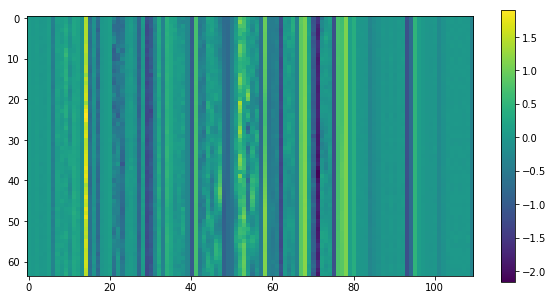

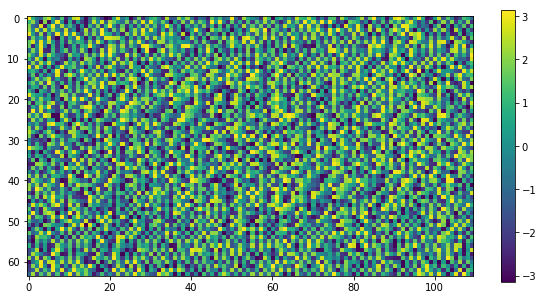

In [31]:
n = 7911

plt.imshow(x_train[n])
plt.colorbar()
fig_size = (10,5)
plt.rcParams["figure.figsize"] = fig_size
plt.show()

fft_train = np.fft.fft2(x_train[n])
plt.imshow(np.angle(fft_train))
plt.colorbar()
plt.rcParams["figure.figsize"] = fig_size
plt.show()